## Dbscan

- El objetivo de este algoritmo es definir grupos como regiones continuas de alta densidad:
    - Para cada instancia,el algoritmo cuenta cuantas instancias se encuentran a una distancia pequeña $\epsilon$ de ella. Esta región se denomina "vecindad $\epsilon$" de la instancia
    - Si una instancia tiene al menos min_samples instancias en su vecindad $\epsilon$ (incluida ella misma), se considera una instancia central.
    - Todas las instancias de la vecindad de una instancia central pertenecen al mismo grupo. Esta vecindad puede incluir otras instancias centrales: por tanto, una secuencia larga de instancias centrales vecinas forma un solo grupo.
    - Cualquier instancia que no sea una instancia central y no tenga una en su vecindad se considera una anomalía.
    

- Este algoritmo funciona bien si todos los grupos son lo bastante densos y si están bien separados por regiones de baja densidad.

In [3]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np

In [4]:
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_moons

X,y = make_moons(n_samples=1000, noise=0.05)
dbscan = DBSCAN(eps=0.05, min_samples=5)
dbscan.fit(X)

DBSCAN(eps=0.05)

- Las etiquetas de las instancias las tenemos en labels_:

In [5]:
dbscan.labels_

array([ 0,  1,  2,  0,  3,  0,  0,  2,  4,  0,  0,  0,  0, -1,  3,  4,  2,
        0,  3,  5,  0,  1, -1,  1,  3,  0,  3,  7,  3,  1, -1,  0,  3,  6,
        5,  3,  7,  8,  3, -1,  0,  0,  3,  0,  8,  0,  2,  3,  8,  0,  3,
        3,  0,  0,  8,  8,  3,  3,  0,  3,  7,  3,  3,  0,  0,  3,  5, -1,
        0,  0,  7,  3,  2,  3,  3,  3,  3, -1,  3,  0,  6,  0,  0,  3,  0,
        0,  0,  0,  8,  5,  5, -1,  2,  3,  0,  0,  3,  3,  3,  0,  0,  6,
        3,  5, -1,  6,  3,  7,  3,  2,  8,  3,  3,  3,  5,  2,  3,  2,  3,
        0,  3,  3,  2,  6,  0,  3,  0,  0,  3,  2,  3,  2,  8,  0,  0,  2,
        7,  0,  9,  0,  3,  0,  7,  0,  3,  3,  3,  1,  3,  3,  0,  3,  0,
        3,  0,  7,  0,  5,  5,  3,  0,  2,  5,  3,  3,  8,  0,  0,  3,  0,
        3, -1,  3,  6,  0,  3,  0,  3,  6,  0,  7,  0,  0,  0,  3,  0,  5,
        0,  0,  3,  5,  0,  7,  7,  8,  3,  0,  3,  6,  3,  8,  0,  0,  7,
        3,  7,  3,  1,  0,  0, -1,  3,  3,  3,  3,  0,  3,  3,  0,  1,  8,
        3,  3,  7,  0,  3

- Algunas de las intancias tienen un índice de grupo igual a -1: significa que el algoritmo las considera anomalías.

- Los índices de las instancias centrales están disponiblesw en la variable instancia core_sample_indices_
- Las propias instancias centrales están disponihbles en la variable de instancia components_

In [6]:
len(dbscan.core_sample_indices_)

802

In [7]:
dbscan.core_sample_indices_

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  11,  12,  14,
        15,  16,  17,  18,  19,  20,  21,  23,  24,  25,  26,  28,  29,
        31,  32,  33,  34,  35,  36,  37,  38,  40,  41,  42,  43,  44,
        45,  47,  48,  49,  50,  51,  52,  53,  54,  55,  56,  57,  58,
        60,  62,  63,  64,  65,  66,  68,  69,  70,  71,  72,  73,  74,
        75,  76,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,
        92,  93,  94,  95,  96,  98,  99, 100, 102, 105, 106, 107, 108,
       109, 111, 113, 114, 115, 116, 117, 118, 119, 121, 123, 124, 126,
       127, 128, 129, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140,
       141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 154,
       155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167,
       168, 169, 170, 172, 174, 176, 177, 178, 179, 180, 181, 183, 184,
       185, 186, 187, 188, 189, 190, 192, 193, 194, 195, 196, 197, 198,
       199, 200, 201, 202, 203, 205, 206, 207, 208, 209, 212, 21

In [8]:
dbscan.components_

array([[ 0.26391492, -0.12998024],
       [ 1.93927038,  0.03415148],
       [-0.97700589,  0.14891092],
       ...,
       [ 1.9761152 ,  0.44241025],
       [ 1.04379792, -0.4624679 ],
       [-0.79339621,  0.53269288]])

- Representamos esta agrupación:

In [9]:
def plot_dbscan(dbscan, X, size, show_xlabels=True, show_ylabels=True):
    core_mask = np.zeros_like(dbscan.labels_, dtype=bool)
    core_mask[dbscan.core_sample_indices_] = True
    anomalies_mask = dbscan.labels_ == -1
    non_core_mask = ~(core_mask | anomalies_mask)

    cores = dbscan.components_
    anomalies = X[anomalies_mask]
    non_cores = X[non_core_mask]
    
    plt.scatter(cores[:, 0], cores[:, 1],
                c=dbscan.labels_[core_mask], marker='o', s=size, cmap="Paired")
    plt.scatter(cores[:, 0], cores[:, 1], marker='*', s=20, c=dbscan.labels_[core_mask])
    plt.scatter(anomalies[:, 0], anomalies[:, 1],
                c="r", marker="x", s=100)
    plt.scatter(non_cores[:, 0], non_cores[:, 1], c=dbscan.labels_[non_core_mask], marker=".")
    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)
    plt.title("eps={:.2f}, min_samples={}".format(dbscan.eps, dbscan.min_samples), fontsize=14)

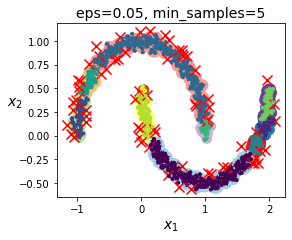

In [10]:
plt.figure(figsize=(9, 3.2))

plt.subplot(121)
plot_dbscan(dbscan, X, size=100)

plt.show()

- Ampliemos la vecindad de cada instancia a eps=0.2 a ver que aspecto tiene:

In [11]:
dbscan2 = DBSCAN(eps=0.2, min_samples=5)
dbscan2.fit(X)

DBSCAN(eps=0.2)

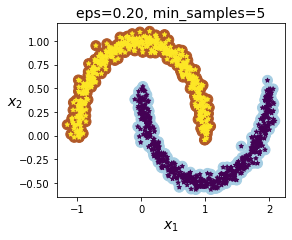

In [12]:
plt.figure(figsize=(9, 3.2))

plt.subplot(121)
plot_dbscan(dbscan2, X, size=100)

plt.show()

- Si enfrentamos ambos veremos la diferencia:

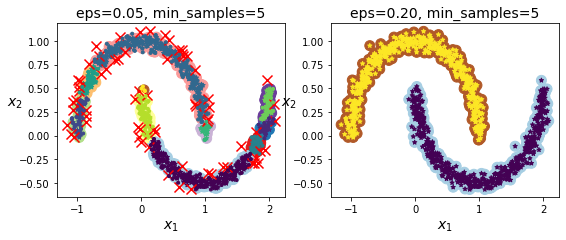

In [13]:
plt.figure(figsize=(9, 3.2))

plt.subplot(121)
plot_dbscan(dbscan, X, size=100)

plt.subplot(122)
plot_dbscan(dbscan2, X, size=100)

plt.show()

- Vemos que es mejor con epsilo=0.2

- La clase dbscan no tiene método predict(), pero tiene un método fit_predict() ya que no puede predecir a qué grupo pertenece una nueva instancia.

- Esta decisión se tomó para que a dbscan se le pudiesen aplicar distintos algoritmos de clasificación, porque depende del caso de uso, un algoritmo puede ser mejor que otro

- Vamos a implementar un algoritmo de clasificación para dbscan:

In [14]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=50)
knn.fit(dbscan.components_, dbscan.labels_[dbscan.core_sample_indices_])

KNeighborsClassifier(n_neighbors=50)

- De esta forma si nos dan instancias nuevas podemos predecir a qué grupo pertenecen:

In [15]:
X_new = np.array([[-0.5,0], [0,0.5],[1,-0.1],[2,1]])

In [16]:
knn.predict(X_new)

array([2, 8, 6, 7], dtype=int64)

In [17]:
knn.predict_proba(X_new)

array([[0.  , 0.  , 0.84, 0.  , 0.  , 0.02, 0.  , 0.  , 0.14, 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.96, 0.04],
       [0.28, 0.  , 0.  , 0.3 , 0.  , 0.  , 0.42, 0.  , 0.  , 0.  ],
       [0.  , 0.12, 0.  , 0.  , 0.  , 0.  , 0.  , 0.88, 0.  , 0.  ]])

- Hay que tener en cuenta que solo hemos entrenado el clasificador en las instancias centrales, pero podríamos haber elegido entrenarlo en todas las instancias o en todas menos las anomalías: esta elección depende de la tarea final.

- Se puede introducir una distancia máxima con el fin de detectar anomalías. Para ello, utiliza el método kneightbors() del KNeighborsClassifier, donde si se da un conjunto de instancias, se devuelve las distancias y los índices de los k vecinos más cercanos en el conjunto de entrenamienot (dos matrices, cada una con k columnas):

In [18]:
y_dist, y_pred_idx = knn.kneighbors(X_new, n_neighbors=1)

In [19]:
y_pred = dbscan.labels_[dbscan.core_sample_indices_][y_pred_idx]

In [20]:
y_pred[y_dist > 0.2] = -1

In [21]:
y_pred.ravel()

array([-1,  9,  6, -1], dtype=int64)

- Dbscan es un algoritmo muy sencillo y potente, capaz de identificar cualquier número de grupos de cualquier forma.
- Su complejidad computacional es $O(m \log m)$, pero la implementación de sklearn si trata un conjunto de datos grandes puede requerir $O(m^2)$